## Подготовка

In [1]:
%load_ext memory_profiler

### Вводные данные:

* замеры производятся на файле размером 37.7 Мб
* замеряются библиотеки Pandas, Modin, Samwise

# Анализ потребляемой памяти

# Создание dataframe, обращение по индексу

### Pandas

In [2]:
%%file memory.py
import pandas as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    
test()

Overwriting memory.py


In [3]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   79.438 MiB   79.438 MiB           1   @profile
     4                                         def test():
     5  263.156 MiB  183.719 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6  263.266 MiB    0.109 MiB           1       col1 = df['popularity']
     7  263.266 MiB    0.000 MiB           1       col2 = df['duration_ms']




### Modin

In [4]:
%%file memory.py
import modin.pandas as pd
from distributed import Client
client = Client()

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    
test()

Overwriting memory.py


In [5]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5  106.578 MiB  106.578 MiB           1   @profile
     6                                         def test():
     7  129.188 MiB   22.609 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     8  129.375 MiB    0.188 MiB           1       col1 = df['popularity']
     9  129.375 MiB    0.000 MiB           1       col2 = df['duration_ms']




### Samwise

In [6]:
%%file memory.py
import samwise as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    
test()

Overwriting memory.py


In [7]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   55.766 MiB   55.766 MiB           1   @profile
     4                                         def test():
     5   55.766 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6   59.734 MiB    3.969 MiB           1       col1 = df['popularity']
     7   64.375 MiB    4.641 MiB           1       col2 = df['duration_ms']




## Корреляция методом Пирсона 

### Pandas

In [8]:
%%file memory.py
import pandas as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'pearson')
    
test()

Overwriting memory.py


In [9]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   78.812 MiB   78.812 MiB           1   @profile
     4                                         def test():
     5  265.344 MiB  186.531 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6  265.453 MiB    0.109 MiB           1       col1 = df['popularity']
     7  265.453 MiB    0.000 MiB           1       col2 = df['duration_ms']
     8  265.516 MiB    0.062 MiB           1       col1.corr(col2, method = 'pearson')




### Modin

In [10]:
%%file memory.py
import modin.pandas as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'pearson')
    
test()

Overwriting memory.py


In [11]:
!python3 -m memory_profiler memory.py

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

To request implementation, send an email to feature_requests@modin.org.
Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   82.750 MiB   82.750 MiB           1   @profile
     4                                         def test():
     5  132.766 MiB   50.016 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6  132.953 MiB    0.188 MiB           1       col1 = df['popularity']
     7  132.969 MiB    0.016 MiB           1       col2 = df['duration_ms']
     8  143.062 MiB   10.094 MiB           1       col1.corr(col2, method = 'pearson')




### Samwise 

In [12]:
%%file memory.py
import samwise as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'pearson')
    
test()

Overwriting memory.py


In [13]:
!python3 -m memory_profiler memory.py

Pearson correlation:   0%|          | 0/232725 [00:00<?, ?it/s]
Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   54.547 MiB   54.547 MiB           1   @profile
     4                                         def test():
     5   54.547 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6   59.297 MiB    4.750 MiB           1       col1 = df['popularity']
     7   63.891 MiB    4.594 MiB           1       col2 = df['duration_ms']
     8   70.000 MiB    6.109 MiB           1       col1.corr(col2, method = 'pearson')




### SciPy with Pandas

In [14]:
%%file memory.py
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    pearsonr(col1, col2)
    
test()

Overwriting memory.py


In [15]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5  116.062 MiB  116.062 MiB           1   @profile
     6                                         def test():
     7  269.656 MiB  153.594 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     8  269.766 MiB    0.109 MiB           1       col1 = df['popularity']
     9  269.766 MiB    0.000 MiB           1       col2 = df['duration_ms']
    10  270.891 MiB    1.125 MiB           1       pearsonr(col1, col2)




### SciPy with Modin

In [16]:
%%file memory.py
import modin.pandas as pd
from scipy.stats import pearsonr
from distributed import Client
client = Client()

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    pearsonr(col1, col2)
    
test()

Overwriting memory.py


In [17]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     6  140.000 MiB  140.000 MiB           1   @profile
     7                                         def test():
     8  163.797 MiB   23.797 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     9  163.969 MiB    0.172 MiB           1       col1 = df['popularity']
    10  163.984 MiB    0.016 MiB           1       col2 = df['duration_ms']
    11  177.703 MiB   13.719 MiB           1       pearsonr(col1, col2)




### SciPy with Samwise

In [18]:
%%file memory.py
import samwise as pd
from scipy.stats import pearsonr


@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    pearsonr(col1, col2)
    
    
test()

Overwriting memory.py


In [19]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5   92.656 MiB   92.656 MiB           1   @profile
     6                                         def test():
     7   92.656 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     8   97.141 MiB    4.484 MiB           1       col1 = df['popularity']
     9  101.719 MiB    4.578 MiB           1       col2 = df['duration_ms']
    10  115.109 MiB   13.391 MiB           1       pearsonr(col1, col2)




## Корреляция методом Спирмана

### Pandas

In [20]:
%%file memory.py
import pandas as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'spearman')
    
test()

Overwriting memory.py


In [21]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   79.125 MiB   79.125 MiB           1   @profile
     4                                         def test():
     5  258.688 MiB  179.562 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6  258.797 MiB    0.109 MiB           1       col1 = df['popularity']
     7  258.812 MiB    0.016 MiB           1       col2 = df['duration_ms']
     8  293.188 MiB   34.375 MiB           1       col1.corr(col2, method = 'spearman')




### Samwise 

In [22]:
%%file memory.py
import samwise as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'spearman')
    
test()

Overwriting memory.py


In [23]:
!python3 -m memory_profiler memory.py

Spearman correlation:   0%|          | 0/65537 [00:00<?, ?it/s]
Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   53.344 MiB   53.344 MiB           1   @profile
     4                                         def test():
     5   53.344 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6   58.078 MiB    4.734 MiB           1       col1 = df['popularity']
     7   62.719 MiB    4.641 MiB           1       col2 = df['duration_ms']
     8  101.484 MiB   38.766 MiB           1       col1.corr(col2, method = 'spearman')




### SciPy with Pandas

In [24]:
%%file memory.py
import pandas as pd
from scipy.stats import spearmanr

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    spearmanr(col1, col2)
    
test()

Overwriting memory.py


In [25]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4  116.594 MiB  116.594 MiB           1   @profile
     5                                         def test():
     6  271.047 MiB  154.453 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     7  271.156 MiB    0.109 MiB           1       col1 = df['popularity']
     8  271.156 MiB    0.000 MiB           1       col2 = df['duration_ms']
     9  272.375 MiB    1.219 MiB           1       spearmanr(col1, col2)




### SciPy with Samwise

In [26]:
%%file memory.py
import samwise as pd
from scipy.stats import spearmanr

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    spearmanr(col1, col2)
    
    
test()

Overwriting memory.py


In [27]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4   92.500 MiB   92.500 MiB           1   @profile
     5                                         def test():
     6   92.500 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     7   96.562 MiB    4.062 MiB           1       col1 = df['popularity']
     8  101.125 MiB    4.562 MiB           1       col2 = df['duration_ms']
     9  137.375 MiB   36.250 MiB           1       spearmanr(col1, col2)




## Ковариация

### NumPy with Pandas

In [28]:
%%file memory.py
import pandas as pd
from numpy import cov

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    cov(col1, col2)
    
test()

Overwriting memory.py


In [29]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4   80.203 MiB   80.203 MiB           1   @profile
     5                                         def test():
     6  268.297 MiB  188.094 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     7  268.422 MiB    0.125 MiB           1       col1 = df['popularity']
     8  268.422 MiB    0.000 MiB           1       col2 = df['duration_ms']
     9  272.000 MiB    3.578 MiB           1       cov(col1, col2)




### NumPy with Samwise

In [30]:
%%file memory.py
import samwise as pd
from numpy import cov


@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    cov(col1, col2)
    
    
test()

Overwriting memory.py


In [31]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5   54.812 MiB   54.812 MiB           1   @profile
     6                                         def test():
     7   54.812 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     8   59.422 MiB    4.609 MiB           1       col1 = df['popularity']
     9   64.000 MiB    4.578 MiB           1       col2 = df['duration_ms']
    10   78.062 MiB   14.062 MiB           1       cov(col1, col2)




### NumPy with Modin

In [32]:
%%file memory.py
import modin.pandas as pd
from numpy import cov


@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    cov(col1, col2)
    
    
test()

Overwriting memory.py


In [33]:
!python3 -m memory_profiler memory.py

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5   82.344 MiB   82.344 MiB           1   @profile
     6                                         def test():
     7  127.203 MiB   44.859 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     8  127.359 MiB    0.156 MiB           1       col1 = df['popularity']
     9  127.391 MiB    0.031 MiB           1       col2 = df['duration_ms']
    10  137.469 MiB   10.078 MiB           1       cov(col1, col2)




## Минимум, максимум, среднее, сумма на столбце

### Pandas

In [34]:
%%file memory.py
import pandas as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.min()
    col1.max()
    col1.mean()
    col1.sum()
    
test()

Overwriting memory.py


In [35]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   79.156 MiB   79.156 MiB           1   @profile
     4                                         def test():
     5  271.906 MiB  192.750 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6  272.016 MiB    0.109 MiB           1       col1 = df['popularity']
     7  272.016 MiB    0.000 MiB           1       col2 = df['duration_ms']
     8  272.062 MiB    0.047 MiB           1       col1.min()
     9  272.062 MiB    0.000 MiB           1       col1.max()
    10  272.062 MiB    0.000 MiB           1       col1.mean()
    11  272.062 MiB    0.000 MiB           1       col1.sum()




### Modin

In [36]:
%%file memory.py
import modin.pandas as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.min()
    col1.max()
    col1.mean()
    col1.sum()
    
test()

Overwriting memory.py


In [37]:
!python3 -m memory_profiler memory.py

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   82.547 MiB   82.547 MiB           1   @profile
     4                                         def test():
     5  130.500 MiB   47.953 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6  130.688 MiB    0.188 MiB           1       col1 = df['popularity']
     7  130.688 MiB    0.000 MiB           1       col2 = df['duration_ms']
     8  131.656 MiB    0.969 MiB           1       col1.min()
     9  132.125 MiB    0.469 MiB           1       col1.max()
    10  132.422 MiB    0.297 MiB           1       col1.mean()
    11  132.609 MiB    0.188 MiB           1       col1.sum()




### Samwise

In [38]:
%%file memory.py
import samwise as pd

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.min()
    col1.max()
    col1.mean()
    col1.sum()
    
    
test()

Overwriting memory.py


In [39]:
!python3 -m memory_profiler memory.py

Searching sum:   0%|          | 0/232725 [00:00<?, ?it/s]
Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   54.578 MiB   54.578 MiB           1   @profile
     4                                         def test():
     5   54.578 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     6   59.156 MiB    4.578 MiB           1       col1 = df['popularity']
     7   63.750 MiB    4.594 MiB           1       col2 = df['duration_ms']
     8   69.922 MiB    6.172 MiB           1       col1.min()
     9   70.000 MiB    0.078 MiB           1       col1.max()
    10   70.094 MiB    0.094 MiB           1       col1.mean()
    11   70.141 MiB    0.047 MiB           1       col1.sum()




## Линейная регрессия

### Pandas with NumPy

In [40]:
%%file memory.py
import pandas as pd
from sklearn.linear_model import LinearRegression

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    X = df[['popularity', 'duration_ms']]
    y = df['tempo']
    reg = LinearRegression().fit(X, y)
    

test()

Overwriting memory.py


In [41]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4  124.859 MiB  124.859 MiB           1   @profile
     5                                         def test():
     6  311.078 MiB  186.219 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     7  311.328 MiB    0.250 MiB           1       X = df[['popularity', 'duration_ms']]
     8  311.359 MiB    0.031 MiB           1       y = df['tempo']
     9  312.984 MiB    1.625 MiB           1       reg = LinearRegression().fit(X, y)




### Modin with NumPy

In [42]:
%%file memory.py
import modin.pandas as pd
from sklearn.linear_model import LinearRegression

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    X = df[['popularity', 'duration_ms']]
    y = df['tempo']
    reg = LinearRegression().fit(X, y)

test()

Overwriting memory.py


In [43]:
!python3 -m memory_profiler memory.py

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4  127.000 MiB  127.000 MiB           1   @profile
     5                                         def test():
     6  168.859 MiB   41.859 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     7  169.047 MiB    0.188 MiB           1       X = df[['popularity', 'duration_ms']]
     8  169.047 MiB    0.000 MiB           1       y = df['tempo']
     9  183.344 MiB   14.297 MiB           1       reg = LinearRegression().fit(X, y)




### Samwise with NumPy

In [44]:
%%file memory.py
import samwise as pd
from sklearn.linear_model import LinearRegression

@profile
def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    X = df[['popularity', 'duration_ms']]
    y = df['tempo']
    reg = LinearRegression().fit(X, y)

test()

Overwriting memory.py


In [45]:
!python3 -m memory_profiler memory.py

Filename: memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4  101.469 MiB  101.469 MiB           1   @profile
     5                                         def test():
     6  101.469 MiB    0.000 MiB           1       df = pd.read_csv('../data/SpotifyFeatures.csv')
     7  101.469 MiB    0.000 MiB           1       X = df[['popularity', 'duration_ms']]
     8  106.125 MiB    4.656 MiB           1       y = df['tempo']
     9  156.797 MiB   50.672 MiB           1       reg = LinearRegression().fit(X, y)




# Анализ времени работы

# Создание dataframe, обращение по индексу

### Pandas

In [46]:
import time
import pandas as pd

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    
start_time = time.time()
test()
pd_time = time.time() - start_time
print("%s seconds" % pd_time)

0.34649181365966797 seconds


### Modin

In [47]:
import modin.pandas as pd
from distributed import Client
client = Client()

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    co1 = df['popularity']
    
start_time = time.time()
test()
md_time = time.time() - start_time
print("%s seconds" % md_time)

0.33445096015930176 seconds


### Samwise

In [48]:
import samwise as pd

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    co1 = df['popularity']
    
start_time = time.time()
test()
sw_time = time.time() - start_time
print("%s seconds" % sw_time)

1.0120539665222168 seconds


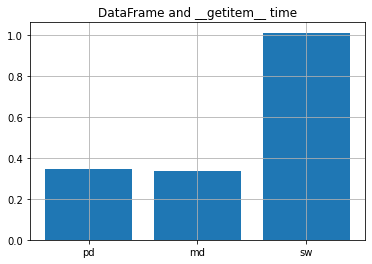

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = [pd_time, md_time, sw_time]
z1 = ['pd', 'md', 'sw']

# bar()
fig = plt.figure()
plt.bar(z1, x)
plt.title('DataFrame and __getitem__ time')
plt.grid(True)
plt.show()

## Корреляция методом Пирсона 

### Pandas

In [50]:
import pandas as pd
import time

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'pearson')
    
start_time = time.time()
test()
pd_time = time.time() - start_time
print("%s seconds" % pd_time)

0.41103100776672363 seconds


### Modin

In [51]:
import modin.pandas as pd
import time
from distributed import Client
client = Client()

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'pearson')
    
start_time = time.time()
test()
md_time = time.time() - start_time
print("%s seconds" % md_time)

Perhaps you already have a cluster running?
Hosting the HTTP server on port 64084 instead
To request implementation, send an email to feature_requests@modin.org.


1.5299160480499268 seconds


### Samwise 

In [52]:
import samwise as pd

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'pearson')
    
start_time = time.time()
test()
sw_time = time.time() - start_time
print("%s seconds" % sw_time)

Searching mean:   0%|          | 0/65537 [00:00<?, ?it/s]

Searching mean:   0%|          | 0/232725 [00:00<?, ?it/s]

Pearson correlation:   0%|          | 0/232725 [00:00<?, ?it/s]

4.887728929519653 seconds


### SciPy with Pandas

In [53]:
import pandas as pd
from scipy.stats import pearsonr

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    pearsonr(col1, col2)
    
start_time = time.time()
test()
pd_scipy_time = time.time() - start_time
print("%s seconds" % pd_scipy_time)

0.3421661853790283 seconds


### SciPy with Modin

In [54]:
import modin.pandas as pd
from scipy.stats import pearsonr

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    pearsonr(col1, col2)
    
start_time = time.time()
test()
md_scipy_time = time.time() - start_time
print("%s seconds" % md_scipy_time)

0.2828340530395508 seconds


### SciPy with Samwise

In [55]:
import samwise as pd
from scipy.stats import pearsonr

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    pearsonr(col1, col2)
    
start_time = time.time()
test()
sw_scipy_time = time.time() - start_time
print("%s seconds" % sw_scipy_time)

6.885685920715332 seconds


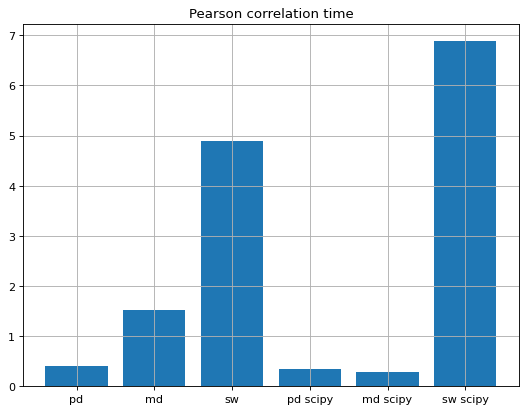

In [56]:
import matplotlib.pyplot as plt
import numpy as np

x = [pd_time, md_time, sw_time, pd_scipy_time, md_scipy_time, sw_scipy_time]
z1 = ['pd', 'md', 'sw', 'pd scipy', 'md scipy', 'sw scipy']

# bar()
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.bar(z1, x)
plt.title('Pearson correlation time')
plt.grid(True)
plt.show()

## Корреляция методом Спирмана

### Pandas

In [57]:
import pandas as pd

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    col1.corr(col2, method = 'spearman')
    
start_time = time.time()
test()
pd_time = time.time() - start_time
print("%s seconds" % pd_time)

0.43595004081726074 seconds


### Samwise 

In [58]:
import samwise as pd

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    df.spearman('popularity', 'duration_ms')
    
start_time = time.time()
test()
sw_time = time.time() - start_time
print("%s seconds" % sw_time)

1. Ranking:   0%|          | 0/232725 [00:00<?, ?it/s]

2. Ranking:   0%|          | 0/232725 [00:00<?, ?it/s]

3. Ranking:   0%|          | 0/232725 [00:00<?, ?it/s]

Spearman correlation:   0%|          | 0/232725 [00:00<?, ?it/s]

10.824739933013916 seconds


### SciPy with Pandas

In [59]:
import pandas as pd
from scipy.stats import spearmanr

def test():   
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    spearmanr(col1, col2)
    
start_time = time.time()
test()
pd_scipy_time = time.time() - start_time
print("%s seconds" % pd_scipy_time)

0.3624231815338135 seconds


### SciPy with Samwise

In [60]:
import samwise as pd
from scipy.stats import spearmanr

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    spearmanr(col1, col2)

start_time = time.time()
test()
sw_scipy_time = time.time() - start_time
print("%s seconds" % sw_scipy_time)

6.925495147705078 seconds


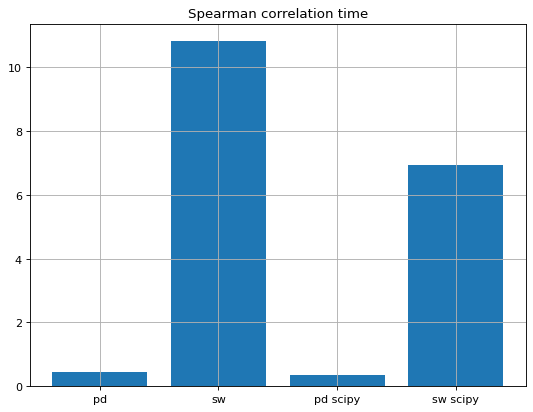

In [61]:
import matplotlib.pyplot as plt
import numpy as np

x = [pd_time, sw_time, pd_scipy_time, sw_scipy_time]
z1 = ['pd', 'sw', 'pd scipy', 'sw scipy']

# bar()
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.bar(z1, x)
plt.title('Spearman correlation time')
plt.grid(True)
plt.show()

## Ковариация

### NumPy with Pandas

In [62]:
import pandas as pd
from numpy import cov

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    cov(col1, col2)
    
start_time = time.time()
test()
pd_time = time.time() - start_time
print("%s seconds" % pd_time)

0.3950040340423584 seconds


### NumPy with Modin

In [63]:
import modin.pandas as pd
from numpy import cov

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    cov(col1, col2)
    
start_time = time.time()
test()
md_time = time.time() - start_time
print("%s seconds" % md_time)

0.28740906715393066 seconds


### NumPy with Samwise

In [64]:
import samwise as pd
from numpy import cov

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    col1 = df['popularity']
    col2 = df['duration_ms']
    cov(col1, col2) 
    
start_time = time.time()
test()
sw_time = time.time() - start_time
print("%s seconds" % sw_time)

6.932316064834595 seconds


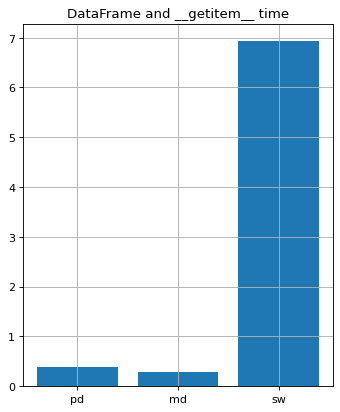

In [65]:
import matplotlib.pyplot as plt
import numpy as np

x = [pd_time, md_time, sw_time]
z1 = ['pd', 'md', 'sw']

# bar()
fig = plt.figure(figsize=(5, 6), dpi=80)
plt.bar(z1, x)
plt.title('DataFrame and __getitem__ time')
plt.grid(True)
plt.show()

## Минимум, максимум, среднее, сумма на столбце

### Pandas

In [66]:
import pandas as pd

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.min()
pd_min = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.max()
pd_max = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.sum()
pd_sum = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.mean()
pd_mean = time.time() - start_time

### Modin

In [67]:
import modin.pandas as pd

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.min()
md_min = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.max()
md_max = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.sum()
md_sum = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.mean()
md_mean = time.time() - start_time

### Samwise

In [68]:
import samwise as pd

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.min()
sw_min = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.max()
sw_max = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.sum()
sw_sum = time.time() - start_time

start_time = time.time()
df = pd.read_csv('../data/SpotifyFeatures.csv')
col1 = df['popularity']
col1.mean()
sw_mean = time.time() - start_time

Searching minimum:   0%|          | 0/65537 [00:00<?, ?it/s]

Searching maximum:   0%|          | 0/65537 [00:00<?, ?it/s]

Searching sum:   0%|          | 0/65537 [00:00<?, ?it/s]

Searching mean:   0%|          | 0/65537 [00:00<?, ?it/s]

0.3320329189300537 0.22636890411376953 1.923563003540039


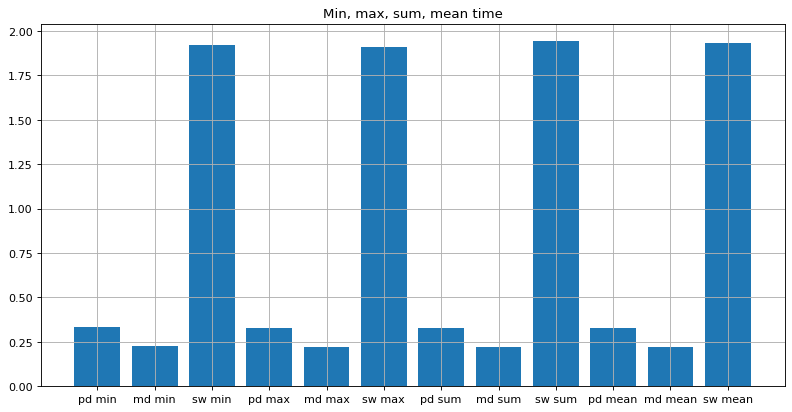

In [69]:
import matplotlib.pyplot as plt
import numpy as np

x = [pd_min, md_min, sw_min, pd_max, md_max, sw_max, pd_sum, md_sum, sw_sum, pd_mean, md_mean, sw_mean]
z1 = ['pd min', 'md min', 'sw min', 'pd max', 'md max', 'sw max', 'pd sum', 'md sum', 'sw sum', 'pd mean', 'md mean', 'sw mean']

print(pd_min, md_min, sw_min)

# bar()
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.bar(z1, x)
plt.title('Min, max, sum, mean time')
plt.grid(True)
plt.show()

## Линейная регрессия

### Pandas with NumPy

In [70]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    X = df[['popularity', 'duration_ms']]
    y = df['tempo']
    reg = LinearRegression().fit(X, y)
    

start_time = time.time()
test()
pd_time = time.time() - start_time
print("%s seconds" % pd_time)

0.34724879264831543 seconds


### Modin with NumPy

In [71]:
import modin.pandas as pd
from sklearn.linear_model import LinearRegression

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    X = df[['popularity', 'duration_ms']]
    y = df['tempo']
    reg = LinearRegression().fit(X, y)
    

start_time = time.time()
test()
md_time = time.time() - start_time
print("%s seconds" % md_time)

0.29489898681640625 seconds


### Samwise with NumPy

In [72]:
import samwise as pd
from sklearn.linear_model import LinearRegression

def test():
    df = pd.read_csv('../data/SpotifyFeatures.csv')
    X = df[['popularity', 'duration_ms']]
    y = df['tempo']
    reg = LinearRegression().fit(X, y)

start_time = time.time()
test()
sw_time = time.time() - start_time
print("%s seconds" % sw_time)

5.198812246322632 seconds


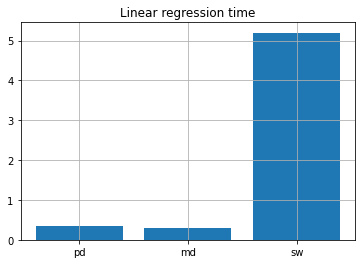

In [73]:
import matplotlib.pyplot as plt
import numpy as np

x = [pd_time, md_time, sw_time]
z1 = ['pd', 'md', 'sw']

# bar()
fig = plt.figure()
plt.bar(z1, x)
plt.title('Linear regression time')
plt.grid(True)
plt.show()